<a href="https://colab.research.google.com/github/CT608/Kaggle_Project/blob/main/Airbnb_New_User__Bookings_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb

# New Section

# Import Data

In [2]:
train_users = pd.read_csv("/content/drive/MyDrive/Project/Airbnb New User Bookings/train_users_2.csv")
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
test_users = pd.read_csv("/content/drive/MyDrive/Project/Airbnb New User Bookings/test_users.csv")

In [4]:
age_gender_bkts = pd.read_csv("/content/drive/MyDrive/Project/Airbnb New User Bookings/age_gender_bkts.csv")
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [5]:
sessions = pd.read_csv("/content/drive/MyDrive/Project/Airbnb New User Bookings/sessions.csv")
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [6]:
countries = pd.read_csv("/content/drive/MyDrive/Project/Airbnb New User Bookings/countries.csv")
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


# Data Explore

## train_users

In [7]:
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


### Summary

In [8]:
#summary of dataset
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

### Missing value

In [9]:
#percent of non-missing value
train_users.isna().mean()

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [10]:
#test whether all missing values of "date_first_booking" comes from that the users have not booked yet
train_users[train_users["country_destination"] == "NDF"]["date_first_booking"].value_counts()

Series([], Name: date_first_booking, dtype: int64)

From the result, we can conclude that all missing values of "date_first_booking" comes from that the users have not booked yet.

In [11]:
train_users["first_affiliate_tracked"].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

As the percent of missing value in "first_affiliate_tracked" is not high, we can fill them by "untracked".

In [12]:
train_users["first_affiliate_tracked"] = train_users["first_affiliate_tracked"].fillna("untracked")

Regarding "age", still do not find a way to deal with missing values.

### Data type transform

In [13]:
train_users["date_account_created"] = pd.to_datetime(train_users["date_account_created"])
train_users["date_first_booking"] = pd.to_datetime(train_users["date_first_booking"])

In [14]:
train_users["timestamp_first_active"] = pd.to_datetime(train_users["timestamp_first_active"].astype("str"))

In [15]:
train_users["timestamp_first_active"] = pd.to_datetime(train_users["timestamp_first_active"].dt.date)

### Visualization

#### Time - Lineplot

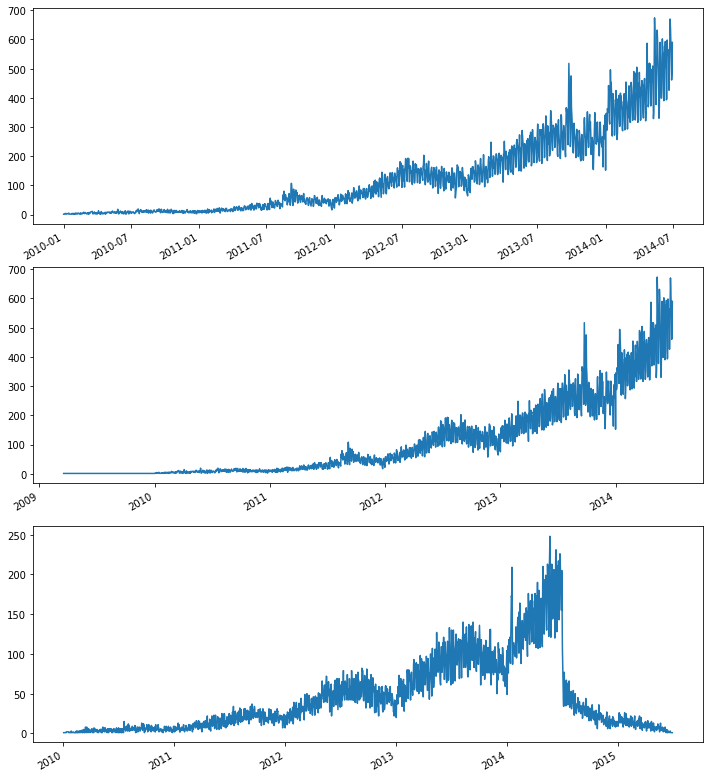

In [16]:
f = plt.figure(figsize=(12,15))
f.add_subplot(3,1,1)
train_users["date_account_created"].value_counts().plot(kind="line")
f.add_subplot(3,1,2)
train_users["timestamp_first_active"].value_counts().plot(kind="line")
f.add_subplot(3,1,3)
train_users["date_first_booking"].value_counts().plot(kind="line")

#### Gender

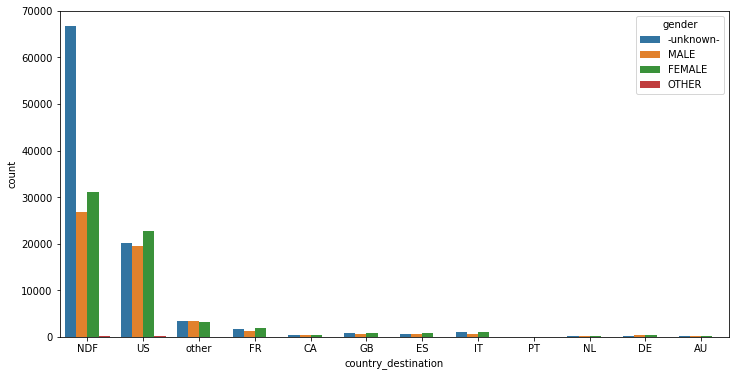

In [17]:
f = plt.figure(figsize=(12,6))
sns.countplot(data=train_users, x="country_destination", hue="gender")

#### Age

In [18]:
data = train_users[-train_users["age"].isna()]
data = data[data["age"] <= 100]

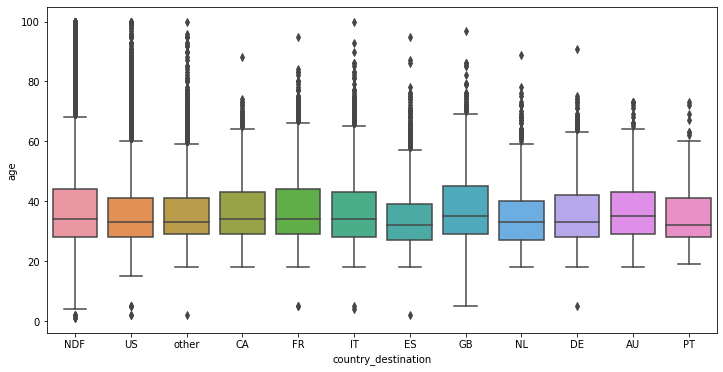

In [19]:
f = plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="country_destination", y="age")

#### Others

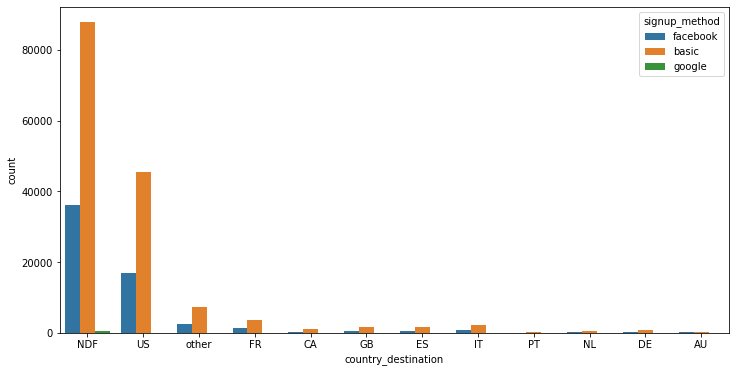

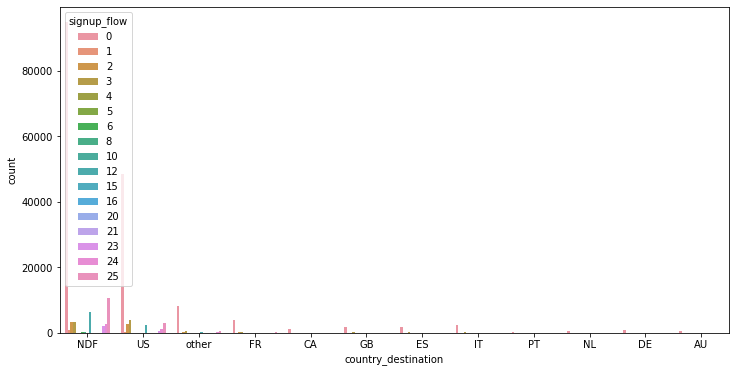

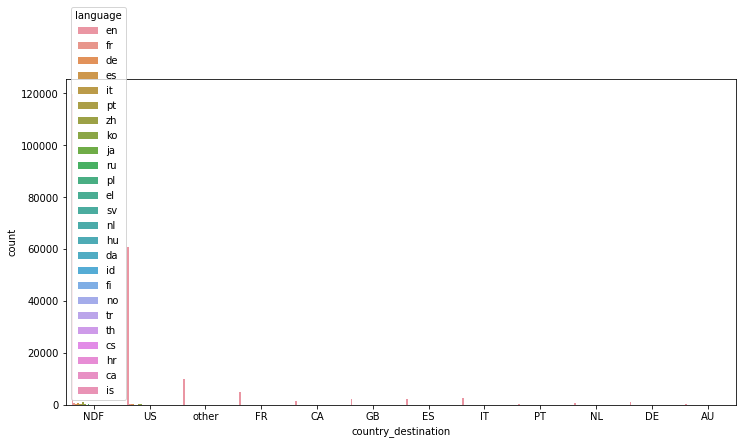

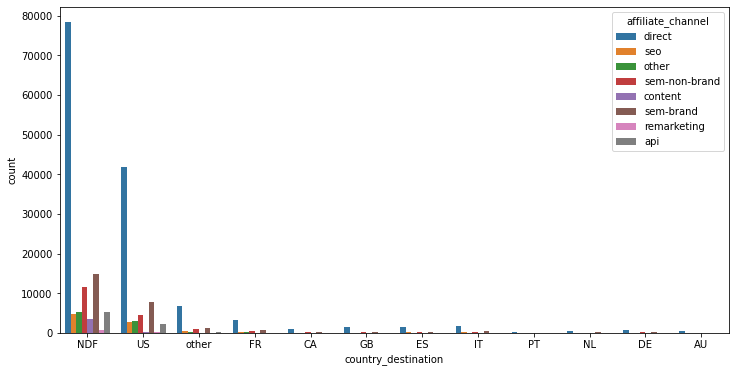

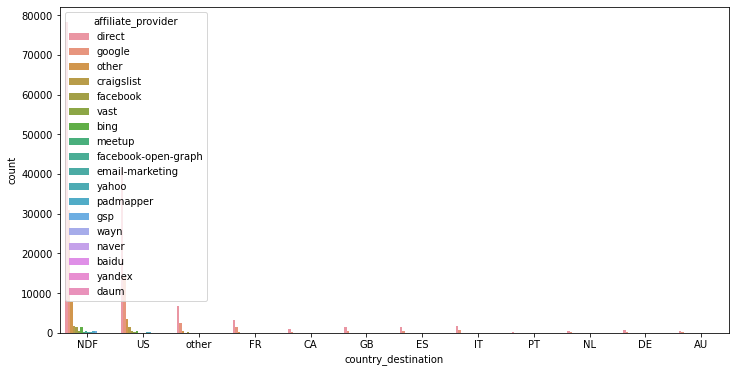

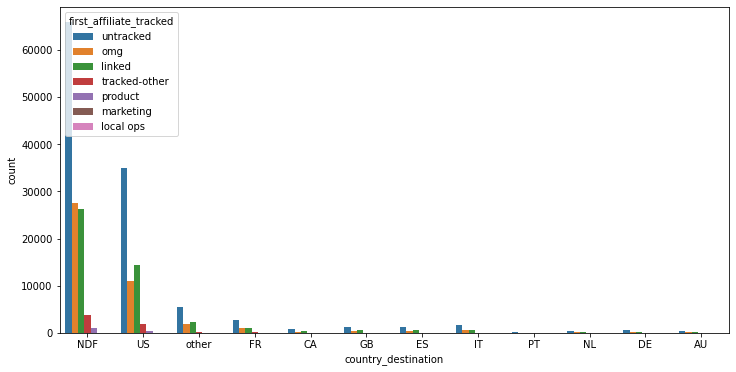

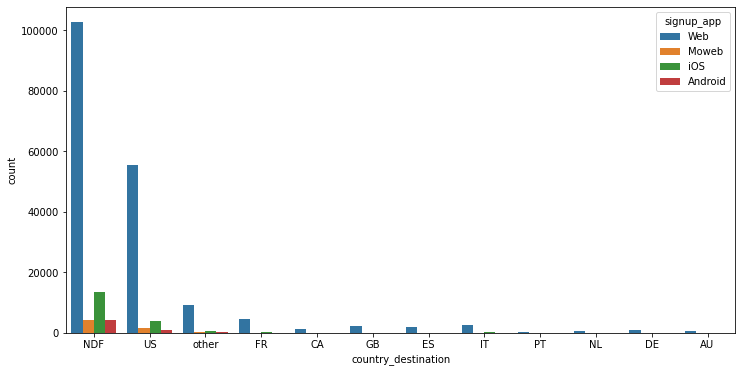

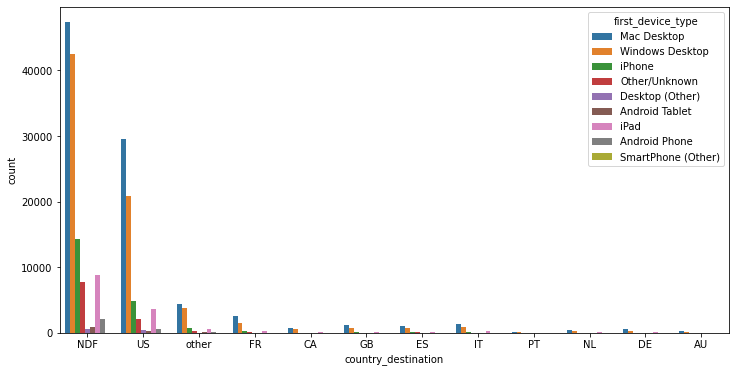

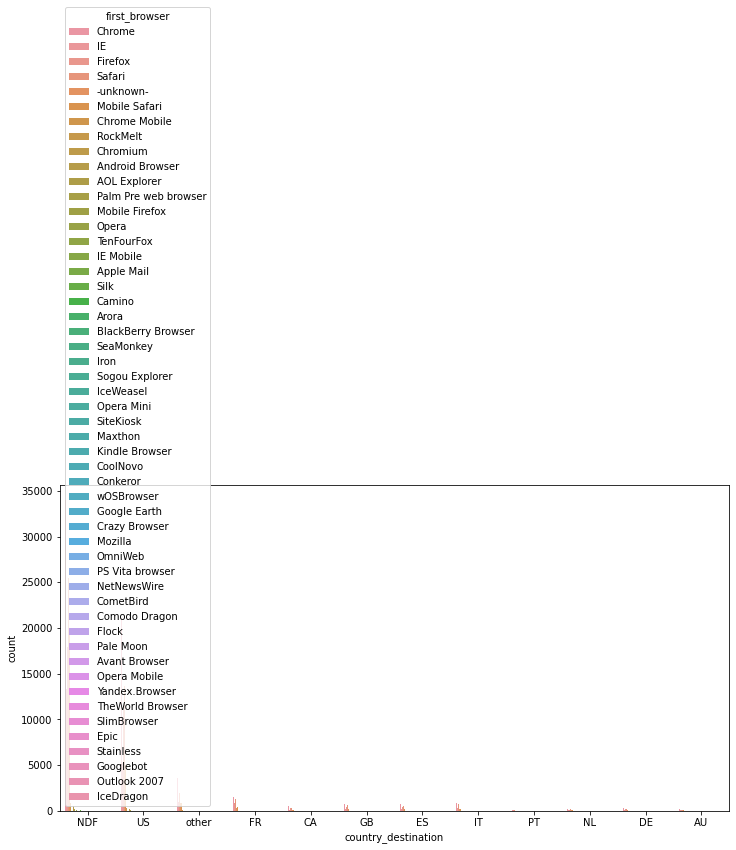

In [20]:
others = ['signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser']

for feature in others:
    f = plt.figure(figsize=(12,6))
    sns.countplot(data=train_users, x="country_destination", hue=feature)

## age_gender_bkts

### Summary

In [21]:
age_gender_bkts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


### Visualiazation

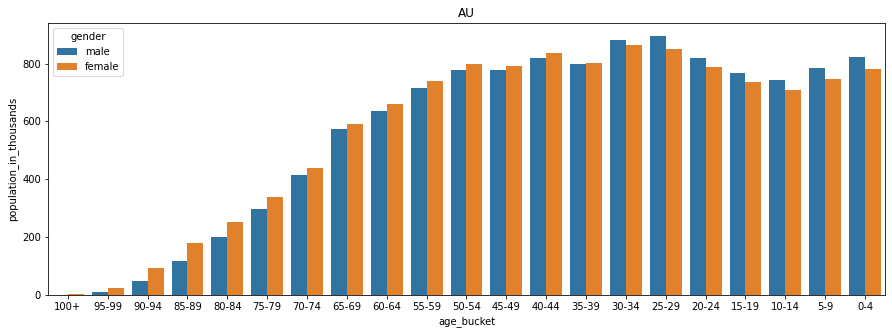

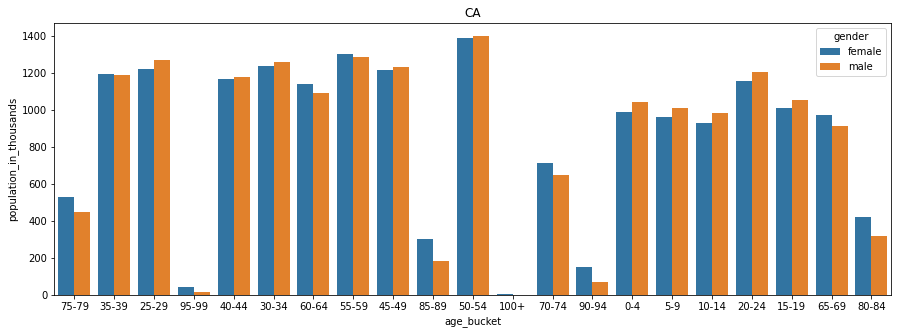

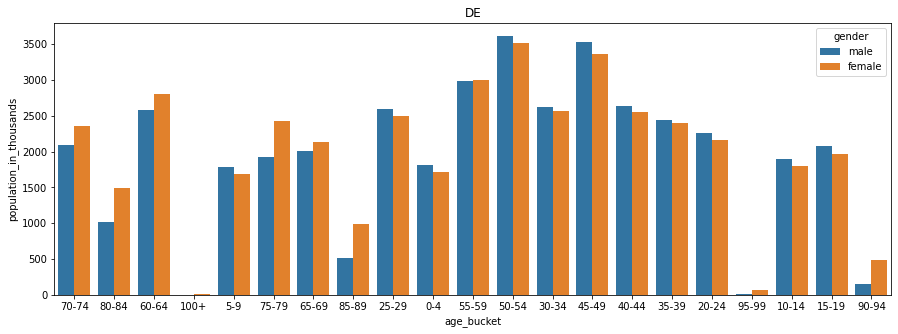

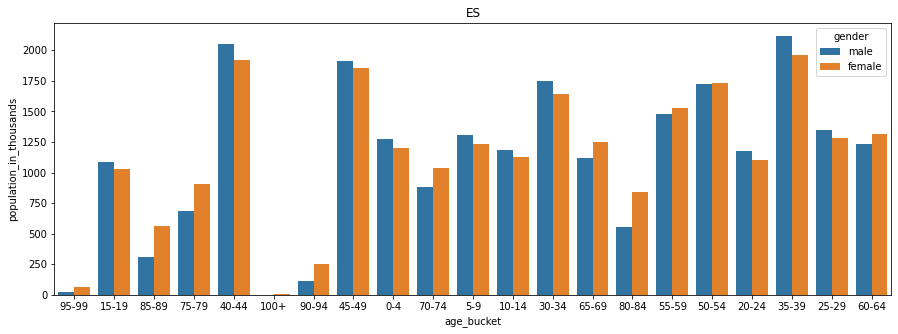

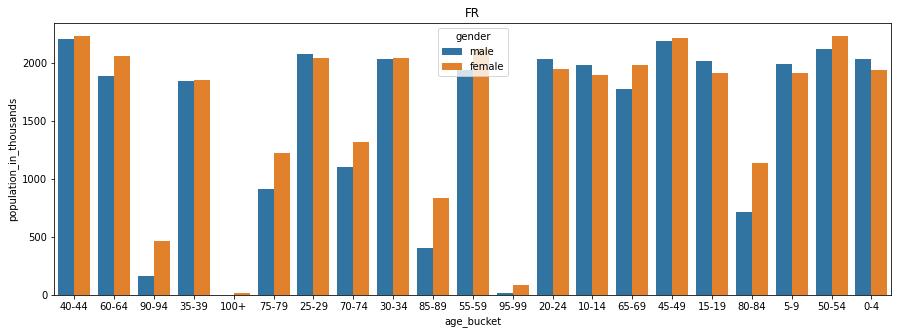

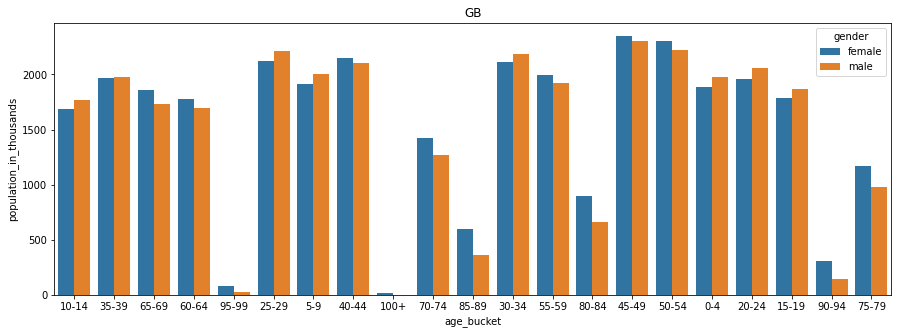

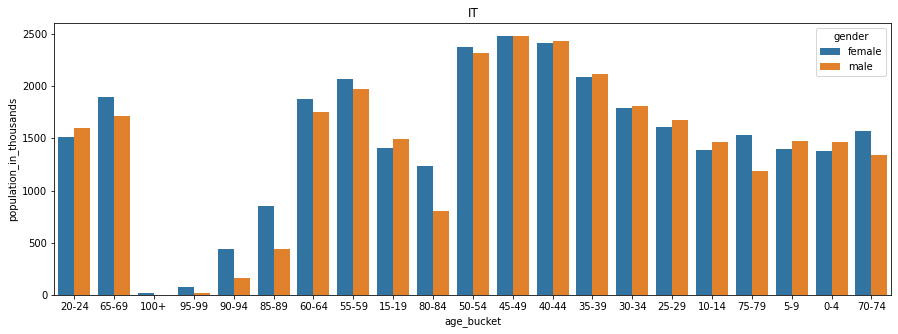

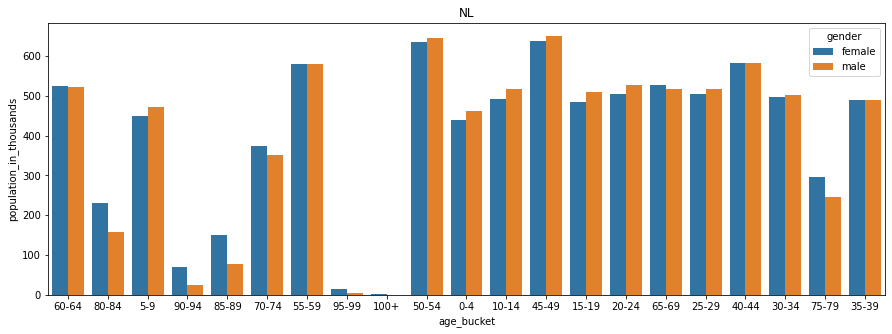

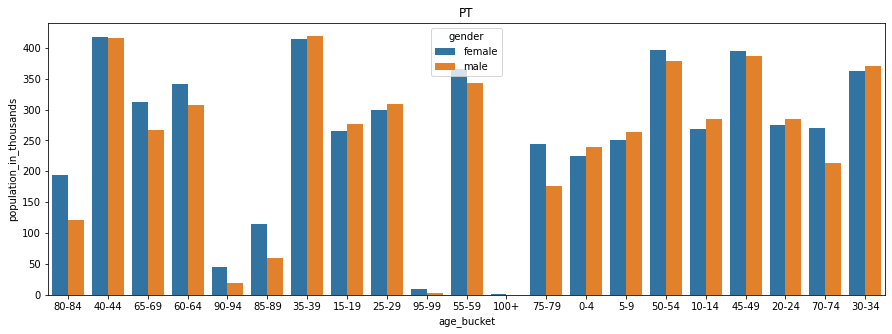

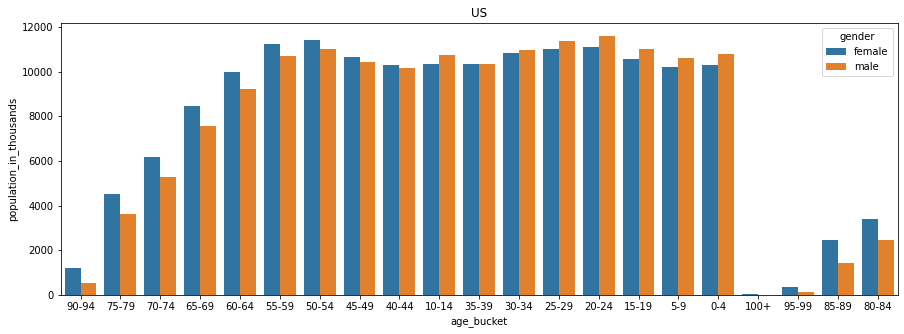

In [22]:
for contr in age_gender_bkts["country_destination"].unique():
    data = age_gender_bkts[age_gender_bkts["country_destination"]==contr]
    f = plt.figure(figsize=(15, 5))
    f.add_subplot(1,1,1)
    sns.barplot(data=data, x="age_bucket", y="population_in_thousands", hue="gender")
    plt.title(contr)

## Sessions

In [23]:
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [24]:
sessions["action_type"].unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response', 'modify'], dtype=object)

In [25]:
sessions["device_type"].unique()

array(['Windows Desktop', '-unknown-', 'Mac Desktop', 'Android Phone',
       'iPhone', 'iPad Tablet', 'Android App Unknown Phone/Tablet',
       'Linux Desktop', 'Tablet', 'Chromebook', 'Blackberry', 'iPodtouch',
       'Windows Phone', 'Opera Phone'], dtype=object)

## countries

In [26]:
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


# Feature Engineering

## Count Action

In [27]:
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [28]:
def count_sess (feature):
    count_group = sessions[["user_id", feature]].groupby(["user_id", feature]).agg(np.size)
    count_group = count_group.reset_index()
    count_group = count_group.rename({0:"count"}, axis=1)
    count_group = count_group.pivot_table(values="count", columns=feature, index="user_id")
    count_group = count_group.fillna(0)
    count_group = count_group.reset_index()
    name = np.array([])
    for i in count_group.columns:
        if i == "user_id":
            name = np.append(name, "id")
        else:
            name = np.append(name, feature+"_"+i)
    count_group.columns = name
    return count_group

In [29]:
for feature in sessions.columns[1:5]:
    count_group = count_sess(feature)
    train_users = pd.merge(train_users, count_group, how="left", on="id")

## Label Encoding

In [30]:
train_users.columns[0:20]

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'action_10', 'action_11',
       'action_12', 'action_15'],
      dtype='object')

In [31]:
def OH_encoder(feature):
    dummise_tmp = pd.get_dummies(train_users[feature])
    name = np.array([])
    for i in dummise_tmp.columns:
        name = np.append(name, feature+"_"+str(i))
    dummise_tmp.columns = name
    return dummise_tmp

In [32]:
features = ['gender', 'signup_method', 'signup_flow', 
            'language', 'affiliate_channel', 'affiliate_provider',
            'first_affiliate_tracked', 'signup_app', 'first_device_type',
            'first_browser']

for feature in features:
    dummise_tmp = OH_encoder(feature)
    train_users = pd.concat([train_users, dummise_tmp], axis=1)

,id,date_account_created,timestamp_first_active,date_first_booking,age,country_destination,action_10,action_11,action_12,action_15,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,gxn3p5htnn,2010-06-28,2009-03-19,NaT,NaN,NDF,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,2009-05-23,NaT,38.0,NDF,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,56.0,US,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,42.0,other,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,41.0,US,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30,NaT,32.0,NDF,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
213447,mhewnxesx9,2014-06-30,2014-06-30,NaT,NaN,NDF,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
213448,6o3arsjbb4,2014-06-30,2014-06-30,NaT,32.0,NDF,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
213449,jh95kwisub,2014-06-30,2014-06-30,NaT,NaN,NDF,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
 train_users = train_users.drop(columns=features)

In [39]:
encoder = OrdinalEncoder()
train_users["country_destination"] = encoder.fit_transform(pd.DataFrame(train_users["country_destination"]))

## Time

In [55]:
train_users["date_account_created_y"] = train_users["date_account_created"].dt.year
train_users["date_account_created_m"] = train_users["date_account_created"].dt.month
train_users["date_account_created_d"] = train_users["date_account_created"].dt.day

In [56]:
train_users["timestamp_first_active_y"] = train_users["timestamp_first_active"].dt.year
train_users["timestamp_first_active_m"] = train_users["timestamp_first_active"].dt.month
train_users["timestamp_first_active_d"] = train_users["timestamp_first_active"].dt.day

In [57]:
train_users = train_users.drop(columns=["date_account_created", "timestamp_first_active"])

# Build Model


In [46]:
from sklearn.model_selection import train_test_split 

In [59]:
x = train_users.drop(columns=["date_first_booking", "country_destination", "id"])
y = train_users["country_destination"]

In [60]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8)

In [61]:
model_xgb = xgb.XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=25,
                    objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)                  
model_xgb.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.5, learning_rate=0.3, max_depth=6,
              n_estimators=25, objective='multi:softprob', seed=0,
              subsample=0.5)

In [63]:
y_pred = model_xgb.predict(x_train)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_train, y_pred)

0.6588896697118763